In [1]:
#统计直方图
def histogram(image):
    (row, col) = image.shape
    #创建长度为256的list
    hist = [0]*256
    for i in range(row):
        for j in range(col):
            hist[image[i,j]] += 1
    hist=hist/np.sum(hist)
    return hist

In [2]:
# 全局灰度线性变换（也可对彩色图像进行线性变换）
def global_linear_transmation(im,c=0,d=255):
    img=im.copy()
    maxV = img.max()
    minV = img.min()
    if maxV==minV:
        return np.uint8(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i, j] = ((d-c) / (maxV - minV)) * (img[i, j] - minV)+c#img[i,j]代表的是某像素点三通道的值
    return np.uint8(img)

# 对img_result进行分段线性灰度变换
#lists存放着各段分段前后的灰度范围,每段有4个值【【原起始，原终止，目标起始，目标终止】，【。。。】】
def piecewise_linear_transformation(im,lists): 
    global img_result,img_empty
    try:
        img=im.copy()
        for list in lists:
            a = int(list[0])
            b = int(list[1])
            c = int(list[2])
            d = int(list[3])
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    if(img[i,j]>=a and img[i,j]<=b):
                        img[i, j] = ((d- c) / (b-a)) * (im[i, j] - a)+c
    except:
        showerror("错误提示","灰度值设置不合理，起始灰度值不能与终止值相同")
        img = img_empty
    return img

#位平面分割
def Bit_Plane_Slicing(im):
    img=im.copy()
    BP=np.zeros([8,img.shape[0],img.shape[1]])
    for n in range(8):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if(img[i,j]>=2**(7-n)):
                    BP[n][i,j]=2**(7-n)
                    img[i,j]=img[i,j]-2**(7-n)
                else:
                    BP[n][i,j]=0
    return BP

#对数变换，默认不改变像素点的范围（0-255）
def logarithmic_transformations(src,a=0,c=1):
    dst=np.zeros([src.shape[0],src.shape[1]])
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            dst[i,j]=a+c*math.log(1+src[i,j])
    return np.uint8(dst)

#幂次（伽马）变换
def power_law_transformations(im,gamma=1,c=1):
    img=np.zeros([im.shape[0],im.shape[1]])
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            img[i,j]=c*255.0*(im[i,j]/255.0)**gamma
    return np.uint8(img)


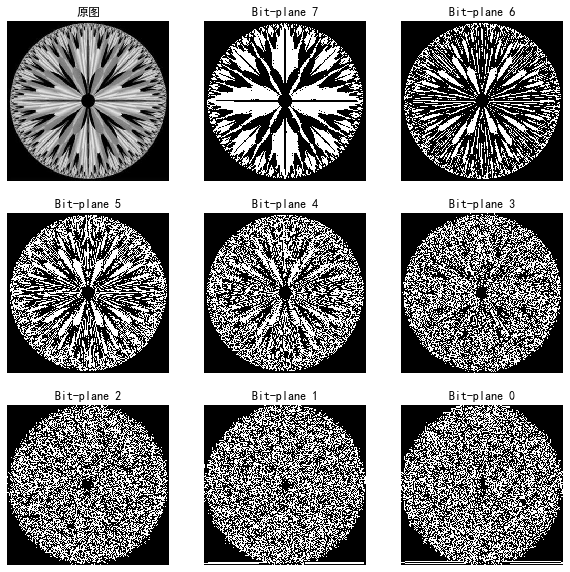

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.family']=['SimHei'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#位平面切片
img0 = cv2.imread(r"..\img\bitSlice.jpg",0)
imgSlices=Bit_Plane_Slicing(img0)
# images=[img0]
# images.extend(imgSlices[:8])
# shapes = np.array([mat.shape for mat in images])
# cols = np.max(shapes[:, 1])
# # 扩展各图像 cols大小，使得 cols一致
# copy_imgs = [cv2.copyMakeBorder(img, 0, 0, 0, cols - img.shape[1],
#                                 cv2.BORDER_CONSTANT, (0, 0, 0)) for img in images]
# # 水平方向合并
# img1=np.hstack(copy_imgs)
# images=imgSlices[2:5]
# shapes = np.array([mat.shape for mat in images])
# cols = np.max(shapes[:, 1])
# # 扩展各图像 cols大小，使得 cols一致
# copy_imgs = [cv2.copyMakeBorder(img, 0, 0, 0, cols - img.shape[1],
#                                 cv2.BORDER_CONSTANT, (0, 0, 0)) for img in images]

# img2=np.hstack(copy_imgs)
# images=imgSlices[5:8]
# shapes = np.array([mat.shape for mat in images])
# cols = np.max(shapes[:, 1])
# # 扩展各图像 cols大小，使得 cols一致
# copy_imgs = [cv2.copyMakeBorder(img, 0, 0, 0, cols - img.shape[1],
#                                 cv2.BORDER_CONSTANT, (0, 0, 0)) for img in images]
# img3=np.hstack(copy_imgs)
# images=[img1]
# images.extend([img2])
# images.extend([img3])
# shapes = np.array([mat.shape for mat in images])
# cols = np.max(shapes[:, 1])
# # 扩展各图像 cols大小，使得 cols一致
# copy_imgs = [cv2.copyMakeBorder(img, 0, 0, 0, cols - img.shape[1],
#                                 cv2.BORDER_CONSTANT, (0, 0, 0)) for img in images]
# imgAll=np.vstack(copy_imgs)
# plt.figure(figsize=(8,8))
# plt.imshow(imgAll,cmap='gray')
plt.figure(figsize=(10,10))
plt.subplot(331)
plt.imshow(img0,cmap='gray')
plt.title("原图")
plt.axis('off')  #不显示坐标轴
for i in range(8):
    plt.subplot(3,3,i+2)
    plt.imshow(imgSlices[i],cmap='gray')
    plt.title("Bit-plane "+str(7-i))
    plt.axis('off')  #不显示坐标轴
    plt.xticks([])
    plt.yticks([])

plt.show()
# plt.savefig("ch03-10.jpg")